# Theory

### 1. What does R-squared represent in a regression model?

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

It represents the proportion of variance in the dependent variable that is predictable from the independent variables.



### 2. What are the assumptions of linear regression?
	•	Linearity
	•	Independence of errors
	•	Homoscedasticity (constant variance of errors)
	•	Normality of residuals
	•	No multicollinearity among predictors



### 3. What is the difference between R-squared and Adjusted R-squared?

$$
\text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \cdot \frac{n - 1}{n - k - 1}
$$
	•	R-squared increases with more variables, regardless of relevance.
	•	Adjusted R-squared adjusts for the number of predictors, penalizing irrelevant ones.



### 4. Why do we use Mean Squared Error (MSE)?

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

It penalizes larger errors more than smaller ones, making it useful for optimization.



### 5. What does an Adjusted R-squared value of 0.85 indicate?

It means that 85% of the variance in the target variable is explained by the model, adjusted for the number of predictors used.



### 6. How do we check for normality of residuals in linear regression?
	•	Histogram or Q-Q plot of residuals
	•	Shapiro-Wilk test or Kolmogorov-Smirnov test



### 7. What is multicollinearity, and how does it impact regression?

Multicollinearity occurs when independent variables are highly correlated, making it hard to estimate individual effects and leading to unstable coefficients.



### 8. What is Mean Absolute Error (MAE)?

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

It gives the average magnitude of errors without considering their direction.



### 9. What are the benefits of using an ML pipeline?
	•	Code modularity and reuse
	•	Easier debugging and tuning
	•	Ensures consistent preprocessing during training and inference


### 10. Why is RMSE considered more interpretable than MSE?

$$
RMSE = \sqrt{MSE}
$$

Since RMSE has the same unit as the target variable, it’s easier to interpret in real-world terms.



### 11. What is pickling in Python, and how is it useful in ML?

Pickling is the process of serializing objects in Python. In ML, it’s used to save models or data for reuse without retraining.

import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)




### 12. What does a high R-squared value mean?

It means that a large proportion of the variance in the target variable is explained by the model.



### 13. What happens if linear regression assumptions are violated?

It can lead to:
	•	Biased or inefficient estimates
	•	Invalid statistical inference (e.g., p-values)
	•	Poor model performance



### 14. How can we address multicollinearity in regression?
	•	Remove or combine correlated predictors
	•	Use dimensionality reduction (PCA)
	•	Apply regularization (Ridge or Lasso)



### 15. How can feature selection improve model performance in regression analysis?
	•	Reduces overfitting
	•	Improves model interpretability
	•	Decreases computation time



### 16. How is Adjusted R-squared calculated?

$$
\text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \cdot \frac{n - 1}{n - k - 1}
$$

Where:
	•	n = number of observations
	•	k = number of predictors



### 17. Why is MSE sensitive to outliers?

Because it squares the errors, larger deviations have a disproportionately high impact.



### 18. What is the role of homoscedasticity in linear regression?

Homoscedasticity ensures constant variance of residuals. If violated, model estimates may be inefficient and inference unreliable.  



### 19. What is Root Mean Squared Error (RMSE)?

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

It measures the average magnitude of prediction errors in the same units as the output variable.


### 20. Why is pickling considered risky?

Pickling is risky because:
	•	It can execute arbitrary code during unpickling, leading to security vulnerabilities if the file is tampered with.
	•	It is not language-independent — only usable in Python.
	•	Pickled files can become incompatible across Python versions or library updates.


### 21. What alternatives exist to pickling for saving ML models?
	•	joblib (optimized for NumPy arrays):

import joblib
joblib.dump(model, 'model.joblib')


	•	ONNX (Open Neural Network Exchange) – framework-independent format.
	•	PMML (Predictive Model Markup Language) – XML-based standard.
	•	Saving model weights in JSON/HDF5 (e.g., Keras models):
	•	Model serialization via cloud tools (e.g., MLflow, TensorFlow Serving)



### 22. What is heteroscedasticity, and why is it a problem?

Heteroscedasticity occurs when the variance of residuals is not constant across levels of an independent variable.
	•	Violates the assumption of constant variance in linear regression
	•	Leads to inefficient estimates and invalid hypothesis tests
	•	May result in biased standard errors, affecting confidence intervals and p-values

Detection:
	•	Residual vs. fitted plot
	•	Breusch-Pagan test



### 23. How can interaction terms enhance a regression model’s predictive power?

Interaction terms model the combined effect of two or more predictors:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 \cdot x_2)
$$
	•	They capture non-additive relationships between features
	•	Allow the model to reflect complex dependencies
	•	Improve predictive accuracy when the effect of one variable depends on another



# Practical

### Q1

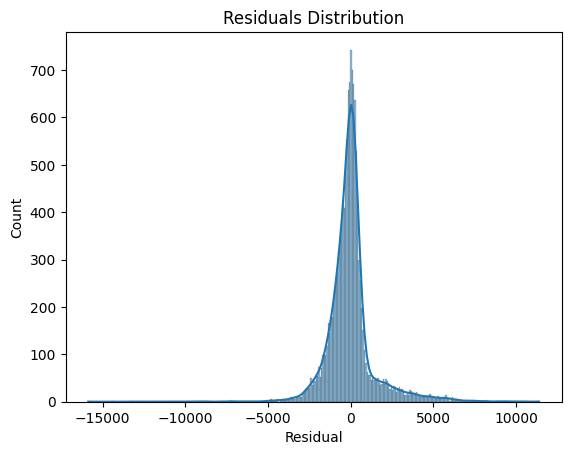

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load & prepare
df = sns.load_dataset('diamonds').dropna()
X = df.select_dtypes('number').drop('price', axis=1)
y = df['price']

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression().fit(X_train, y_train)
residuals = y_test - model.predict(X_test)

# Plot
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()


### Q2

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# y_test, y_pred from previous Question
mse  = mean_squared_error(y_test, y_pred := model.predict(X_test))
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE:  {mse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MSE:  2225535.81
MAE:  889.33
RMSE: 1491.82


### Q3

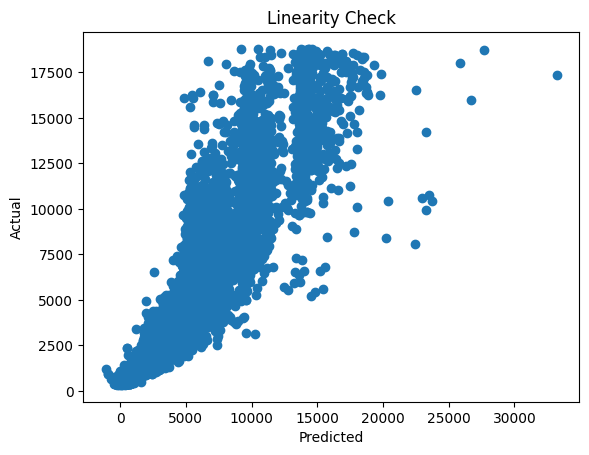

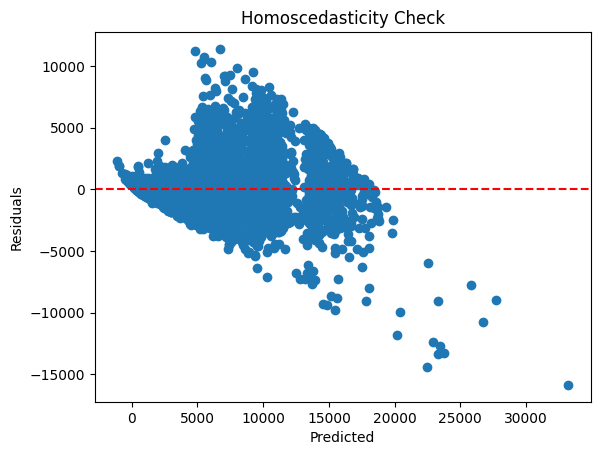

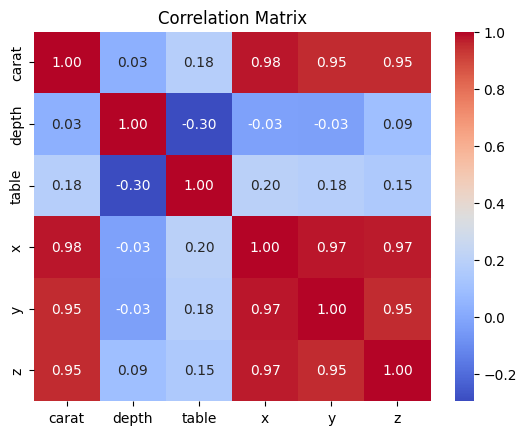

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Linearity: actual vs. predicted
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linearity Check')
plt.show()

# 2) Homoscedasticity: residuals vs. predicted
plt.scatter(y_pred, (residuals := y_test - y_pred))
plt.axhline(0, ls='--', color='r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# 3) Multicollinearity: feature correlation
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Q4

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

models = {
    'OLS':      LinearRegression(),
    'Ridge':    Ridge(alpha=1.0),
    'Lasso':    Lasso(alpha=0.1)
}

for name, reg in models.items():
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('reg',   reg)
    ]).fit(X_train, y_train)

    score = r2_score(y_test, pipe.predict(X_test))
    print(f"{name:>5} R² = {score}")


  OLS R² = 0.8606555297212903
Ridge R² = 0.8606523487170394
Lasso R² = 0.8606495821635294


### Q5

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load toy dataset
X,y = load_diabetes(return_X_y=True)   # e.g. feature 'RM'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression().fit(X_train, y_train)
print("Coef:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", model.score(X_test, y_test))


Coef: [  -7.85976574 -245.0498378   575.12383646  323.84954344 -519.78903584
  250.62690777    0.96998187  180.50547491  614.76359069   52.10566318]
Intercept: 150.9977582372867
R² score: 0.4439690125828356


### Q6

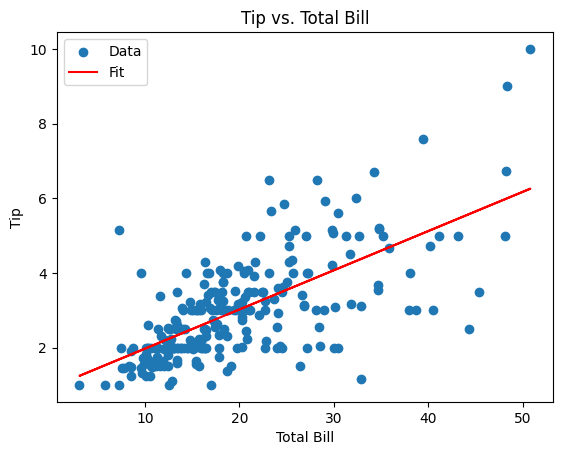

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression().fit(X, y)
pred = model.predict(X)

plt.scatter(X, y, label='Data')
plt.plot(X, pred, color='r', label='Fit')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs. Total Bill')
plt.legend()
plt.show()

### Q7

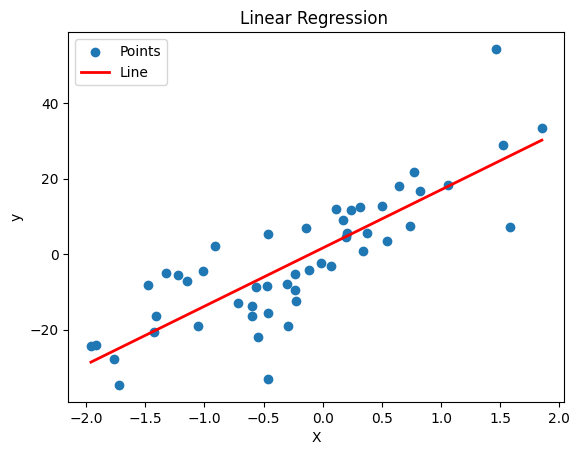

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=50, n_features=1, noise=10, coef=False, random_state=42)

# Fit the model
model = LinearRegression().fit(X, y)

# Predict on new data
np.random.seed(14)
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_new = model.predict(X_new)

# Plot
plt.scatter(X, y, label='Points')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Line')
plt.legend()
plt.title("Linear Regression ")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


### Q8

In [58]:
import pickle
# assume 'model' is already trained

with open('linreg_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to linreg_model.pkl")

Model saved to linreg_model.pkl


### Q9

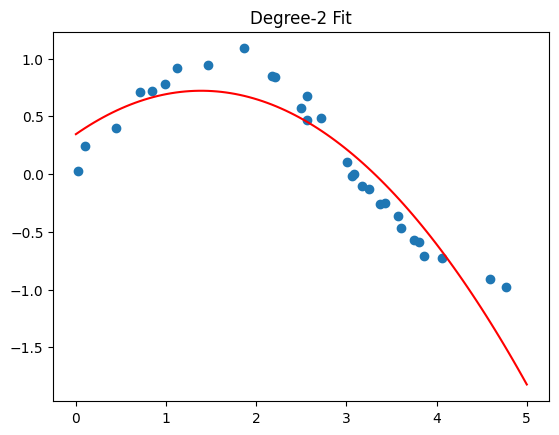

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# sample data
np.random.seed(10)
X = np.sort(np.random.rand(30)*5).reshape(-1,1)
y = np.sin(X).ravel() + np.random.randn(30)*0.1

# Transform + fit
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
model = LinearRegression().fit(X2, y)

# Plot
X_new = np.linspace(0,5,100).reshape(-1,1)
y_new = model.predict(poly.transform(X_new))
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-')
plt.title('Degree-2 Fit')
plt.show()


### Q10

In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(48)
X = np.random.rand(100,1)*20
y = 3.7*X.squeeze() + np.random.randn(100)*5

model = LinearRegression().fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:",  model.intercept_)

Coefficient: 3.6622209552482743
Intercept: 0.05889647749749827


### Q11

In [61]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Synthetic
np.random.seed(47)
X = np.sort(np.random.rand(50)*10).reshape(-1,1)
y = 0.5*X.squeeze()**2 - 2*X.squeeze() + 3 + np.random.randn(50)*5

for deg in [1, 2, 3, 4]:
    poly = PolynomialFeatures(deg)
    Xp = poly.fit_transform(X)
    model = LinearRegression().fit(Xp, y)
    y_pred = model.predict(Xp)
    mse = mean_squared_error(y, y_pred)
    print(f"Degree {deg}: MSE = {mse:.2f}")


Degree 1: MSE = 38.80
Degree 2: MSE = 27.39
Degree 3: MSE = 27.26
Degree 4: MSE = 26.86


### Q12

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load data
data = fetch_california_housing()
X = data.data[:, [0, 7]]  # e.g. MedInc and AveOccup
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Output
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score on test set:", model.score(X_test, y_test))


Coefficients: [ 0.41918756 -0.01847283]
Intercept: -1.7667844304531721
R² score on test set: 0.4603295940234423


### Q13

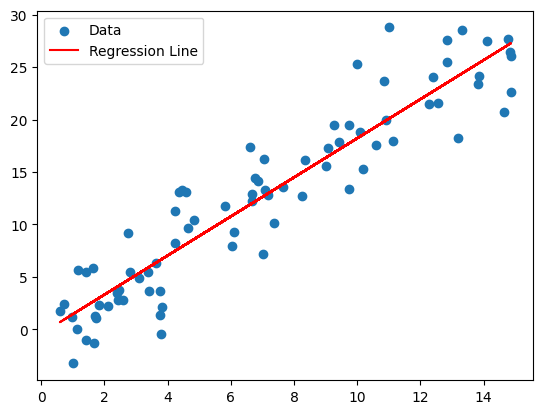

In [63]:

# Generate
np.random.seed(45)
X = np.random.rand(80,1)*15
y = 1.8*X.squeeze() + np.random.randn(80)*3

# Fit
model = LinearRegression().fit(X, y)
yp = model.predict(X)

# Plot
plt.scatter(X, y, label='Data')
plt.plot(X, yp, label='Regression Line' ,color ='red')
plt.legend(); plt.show()


### Q14

In [64]:
import pandas as pd
from sklearn.datasets import load_diabetes
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load example data
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Compute VIF for each feature
vif_data = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_data)


  feature        VIF
0     age   1.217307
1     sex   1.278071
2     bmi   1.509437
3      bp   1.459428
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
7      s4   8.890986
8      s5  10.075967
9      s6   1.484623


### Q15

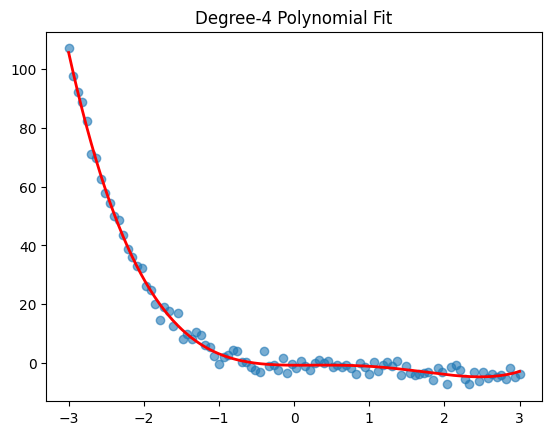

In [65]:

# Generate data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1,1)
y = 0.5*X.squeeze()**4 - 2*X.squeeze()**3 + X.squeeze()**2 + np.random.randn(100)*2

# Fit degree-4 model
poly4 = PolynomialFeatures(degree=4)
X4 = poly4.fit_transform(X)
model = LinearRegression().fit(X4, y)

# Predict & plot
X_plot = np.linspace(-3, 3, 200).reshape(-1,1)
y_plot = model.predict(poly4.transform(X_plot))

plt.scatter(X, y, alpha=0.6)
plt.plot(X_plot, y_plot, 'r-', linewidth=2)
plt.title('Degree-4 Polynomial Fit')
plt.show()


### Q16

In [66]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Synthetic multivariate data
np.random.seed(30)
X = np.random.rand(200, 4)
y = X @ np.array([1.5, -2.0, 3.0, 0.5]) + np.random.randn(200)*0.5

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('ols',   LinearRegression())
]).fit(X_train, y_train)

print("R² score:", pipe.score(X_test, y_test))


R² score: 0.9126918504264663


### Q17

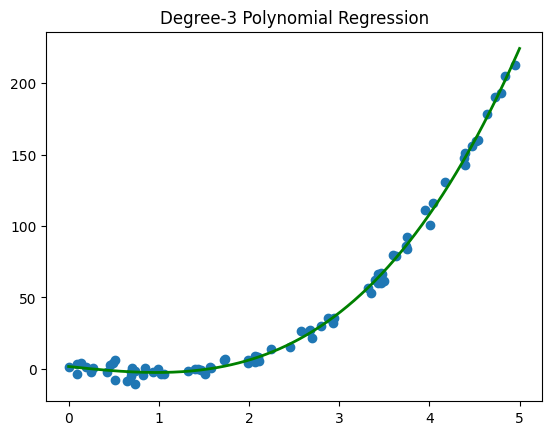

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
np.random.seed(1)
X = np.sort(np.random.rand(80)*5).reshape(-1,1)
y = 2*X.squeeze()**3 - 5*X.squeeze() + np.random.randn(80)*4

# Fit degree-3
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X)
model = LinearRegression().fit(X3, y)

# Plot
X_plot = np.linspace(0,5,200).reshape(-1,1)
y_plot = model.predict(poly3.transform(X_plot))

plt.scatter(X, y)
plt.plot(X_plot, y_plot, 'g-', linewidth=2)
plt.title('Degree-3 Polynomial Regression')
plt.show()


### Q18

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate
np.random.seed(2)
X = np.random.randn(300, 5)
true_coefs = np.array([1.2, -0.8, 2.5, 0.0, 1.0])
y = X @ true_coefs + np.random.randn(300)*0.3

# Split & fit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
model = LinearRegression().fit(X_train, y_train)

print("R²:", model.score(X_test, y_test))
print("Coefs:", model.coef_)


R²: 0.990104349983971
Coefs: [ 1.19473233 -0.80778536  2.48590772  0.0534501   1.01435142]


### Q19

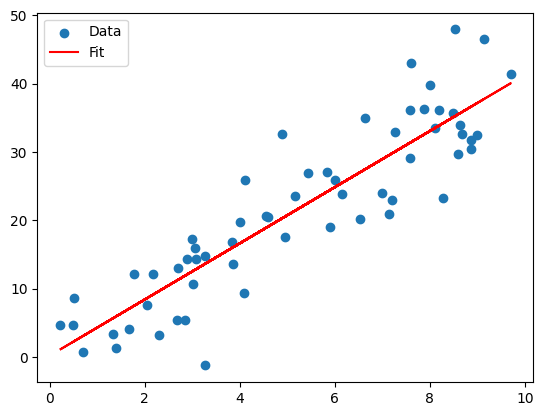

In [69]:

# Data
np.random.seed(21)
X = 10 * np.random.rand(60,1)
y = 4*X.squeeze() + np.random.randn(60)*5

# Fit
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Visualize
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, 'r-', label='Fit')
plt.legend(); plt.show()


### Q20

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create
np.random.seed(3)
X = np.random.rand(150, 3)
y = X @ np.array([2.0, -1.0, 0.5]) + np.random.randn(150)*0.2

# Train/test & fit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
model = LinearRegression().fit(X_train, y_train)

print("R²:", model.score(X_test, y_test))
print("Coefs:", model.coef_)


R²: 0.9165845972177019
Coefs: [ 2.05257936 -0.97579284  0.57614564]


### Q21

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import joblib

# Generate & train
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=4)
model = LinearRegression().fit(X, y)

# Serialize
joblib.dump(model, 'model.joblib')
print("Saved to model.joblib")

# Deserialize
loaded = joblib.load('model.joblib')
print("Loaded model R²:", loaded.score(X, y))


Saved to model.joblib
Loaded model R²: 0.9691138352374227


### Q22

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load & encode
tips = sns.load_dataset('tips')
df = pd.get_dummies(tips, columns=['sex','smoker','day','time'], drop_first=True)

X = df.drop(['tip','total_bill'], axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
model = LinearRegression().fit(X_train, y_train)

print("R²:", model.score(X_test, y_test))
print("Coefs:", dict(zip(X.columns, model.coef_)))


R²: -0.12137440702448443
Coefs: {'size': 0.7989972488667598, 'sex_Female': -0.18466524624259523, 'smoker_No': -0.17255281680266638, 'day_Fri': 0.03135187616614668, 'day_Sat': 0.1298334293899557, 'day_Sun': -0.05328499495393368, 'time_Dinner': 0.2210158765531158}


### Q23

In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Data
np.random.seed(38)
X = np.random.rand(120, 3)
y = 3*X[:,0] - 2*X[:,1] + 1.5*X[:,2] + np.random.randn(120)*0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)
ols   = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=0.5).fit(X_train, y_train)

print("OLS — Coefs:", ols.coef_, "R²:", ols.score(X_test, y_test))
print("Ridge — Coefs:", ridge.coef_, "R²:", ridge.score(X_test, y_test))


OLS — Coefs: [ 2.84485651 -2.1558498   1.56218764] R²: 0.9027303260024184
Ridge — Coefs: [ 2.61967842 -1.99221852  1.48306072] R²: 0.8960748238015402


### Q24

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Synthetic
np.random.seed(58)
X = np.random.rand(100, 4)
y = X @ np.array([1, -1, 2, 0.5]) + np.random.randn(100)*0.3

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("CV R² scores:", scores)
print("Mean CV R²:", scores.mean())


CV R² scores: [0.8319378  0.80616265 0.68806014 0.81413271 0.79004355]
Mean CV R²: 0.7860673707675799


### Q25

In [75]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
np.random.seed(7)
X = np.linspace(0, 5, 80).reshape(-1,1)
y = 0.3*X.squeeze()**3 - X.squeeze()**2 + 2*X.squeeze() + np.random.randn(80)*2

for deg in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=deg)
    Xp = poly.fit_transform(X)
    y_pred = LinearRegression().fit(Xp, y).predict(Xp)
    print(f"Degree {deg}: R² = {r2_score(y, y_pred)}")


Degree 1: R² = 0.7370666396789851
Degree 2: R² = 0.8856038592447948
Degree 3: R² = 0.8940230630858085
Degree 4: R² = 0.8942144675198923
Degree 5: R² = 0.8944728407350431
